In [3]:
import pandas as pd

In [4]:
df=pd.read_excel("/content/IIM_Ranchi_Dataset_Application.xls")

In [5]:
df.head(5)

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


genres are in different format so splitted and created new rows by making genre should have only one in each row

In [6]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [7]:
df['Genres'] = df['Genres'].str.replace('&', ';')

df['Genres'] = df['Genres'].str.split(';')

df_exploded = df.explode('Genres')
df_exploded = df_exploded.drop_duplicates()
df_exploded.reset_index(drop=True,inplace=True)
df_exploded['Genres'].unique()

array(['Art ', ' Design', 'Pretend Play', 'Creativity', 'Action ',
       ' Adventure', 'Auto ', ' Vehicles', 'Beauty', 'Books ',
       ' Reference', 'Business', 'Comics', 'Communication', 'Dating',
       'Education', 'Music ', ' Video', 'Brain Games', 'Entertainment',
       'Events', 'Finance', 'Food ', ' Drink', 'Health ', ' Fitness',
       'House ', ' Home', 'Libraries ', ' Demo', 'Lifestyle', 'Adventure',
       'Arcade', 'Casual', 'Card', 'Action', 'Strategy', 'Puzzle',
       'Sports', 'Music', 'Word', 'Racing', 'Simulation', 'Board',
       'Trivia', 'Role Playing', 'Educational', ' Audio',
       'Video Players ', ' Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel ', ' Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News ', ' Magazines',
       'Maps ', ' Navigation', 'Casino', nan], dtype=object)

Filled 1 for app_Version is not available

THere is one genre named as February 11 2018 so i checked the data that data was mismatched with the column name so i manually mapped the data for ratings column i used code to fill 1 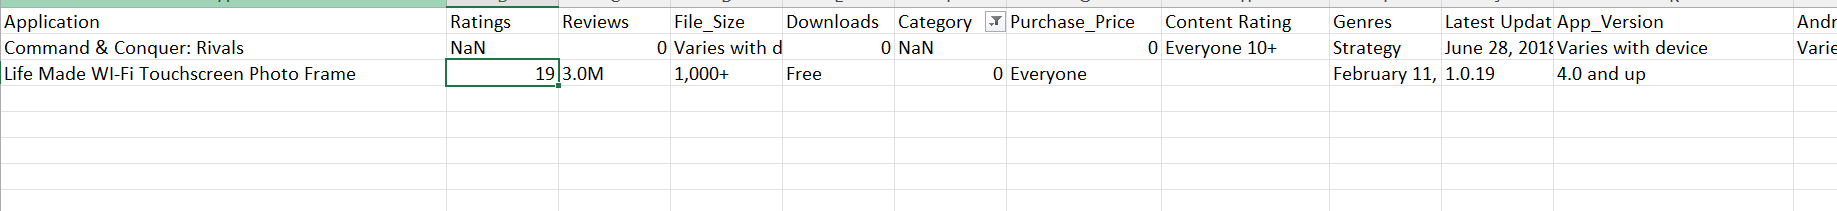

there are 1475 rows with null values of ratings , so i am using ml technique to fill the ratings for missing values instead of filling with some random mean and mode techniques

In [8]:
df_exploded['App_Version'] = df_exploded['App_Version'].fillna(1)
# df['Ratings'] = df['Ratings'].fillna(df['Ratings'].mean())

In [9]:
df_new=df_exploded

one applicaiton name having null, so after checking i confirmed that it is giving value error in excel "=@Free Comics -@Comics" so i manually filled this as Free Comics

In [10]:
df_new['Application']=df_new['Application'].fillna('Free Comics')

In [11]:
df_new['Category'].unique()

array(['Free', 'Paid', nan], dtype=object)

there is only one category with null value and downloads also zero so instead of dropping i made it as free

In [12]:
if df_new['Category'].isnull().any():
  df_new.loc[df_new['Downloads'] == 0, 'Category'] = 'Free'

In [13]:
df_new.isnull().sum()

,0
Application,0
Ratings,1757
Reviews,0
File_Size,0
Downloads,0
Category,0
Purchase_Price,0
Content Rating,0
Genres,1
Latest Updates,0


In [14]:
if df_new['Android_Supported'].isnull().any():
    # Update the 'Android_Supported' column for specific applications
    df_new.loc[df_new['Application'] == "Pi Dark [substratum]", 'Android_Supported'] = '8.0 and up'
    df_new.loc[df_new['Application'] == "[substratum] Vacuum: P", 'Android_Supported'] = '8.0 and up'


I checked these two two rows android supported is having null values so i manually checked in internet for both applicaitons versions and filled according to that

In [15]:
null=df_new[df_new['Genres'].isnull()]

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12734 entries, 0 to 12733
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        12734 non-null  object 
 1   Ratings            10977 non-null  float64
 2   Reviews            12734 non-null  int64  
 3   File_Size          12734 non-null  object 
 4   Downloads          12734 non-null  object 
 5   Category           12734 non-null  object 
 6   Purchase_Price     12734 non-null  object 
 7   Content Rating     12734 non-null  object 
 8   Genres             12733 non-null  object 
 9   Latest Updates     12734 non-null  object 
 10  App_Version        12734 non-null  object 
 11  Android_Supported  12734 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.2+ MB


In [17]:
df_new['Genres'].unique()

array(['Art ', ' Design', 'Pretend Play', 'Creativity', 'Action ',
       ' Adventure', 'Auto ', ' Vehicles', 'Beauty', 'Books ',
       ' Reference', 'Business', 'Comics', 'Communication', 'Dating',
       'Education', 'Music ', ' Video', 'Brain Games', 'Entertainment',
       'Events', 'Finance', 'Food ', ' Drink', 'Health ', ' Fitness',
       'House ', ' Home', 'Libraries ', ' Demo', 'Lifestyle', 'Adventure',
       'Arcade', 'Casual', 'Card', 'Action', 'Strategy', 'Puzzle',
       'Sports', 'Music', 'Word', 'Racing', 'Simulation', 'Board',
       'Trivia', 'Role Playing', 'Educational', ' Audio',
       'Video Players ', ' Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel ', ' Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News ', ' Magazines',
       'Maps ', ' Navigation', 'Casino', nan], dtype=object)

Added photography , lifestyle and personalization to the null value of genre with applicaiton name life made wifi touch screen photo frame

In [18]:
null

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
12304,Life Made WI-Fi Touchscreen Photo Frame,1.0,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [19]:
new_genres = ['Productivity', 'Lifestyle', 'Personalization']
new_rows = []
for genre in new_genres:
    row = null.copy()
    row['Genres'] = genre
    new_rows.append(row)

df_exploded = pd.concat(new_rows, ignore_index=True)

In [20]:
df_new = pd.concat([df_new, df_exploded], ignore_index=True)

In [21]:
df_new = df_new.dropna(subset=['Genres'])


In [22]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art,"January 7, 2018",1.0.0,4.0.3 and up
1,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art,"January 15, 2018",2.0.0,4.0.3 and up
3,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Design,"January 15, 2018",2.0.0,4.0.3 and up
4,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
12732,The SCP Foundation DB fr nn5n,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Reference,"January 19, 2015",Varies with device,Varies with device
12733,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device
12734,Life Made WI-Fi Touchscreen Photo Frame,1.0,19,3.0M,"1,000+",Free,0,Everyone,Productivity,"February 11, 2018",1.0.19,4.0 and up
12735,Life Made WI-Fi Touchscreen Photo Frame,1.0,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


changing file size to mb

In [23]:
import numpy as np
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    return np.nan

df_new['File_Size'] = df_new['File_Size'].apply(convert_size)
df_new['File_Size'].fillna(df_new['File_Size'].mean(), inplace=True)


In [24]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.000000,"10,000+",Free,0,Everyone,Art,"January 7, 2018",1.0.0,4.0.3 and up
1,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.000000,"10,000+",Free,0,Everyone,Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,3.9,967,14.000000,"500,000+",Free,0,Everyone,Art,"January 15, 2018",2.0.0,4.0.3 and up
3,Coloring book moana,3.9,967,14.000000,"500,000+",Free,0,Everyone,Design,"January 15, 2018",2.0.0,4.0.3 and up
4,Coloring book moana,3.9,967,14.000000,"500,000+",Free,0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
12732,The SCP Foundation DB fr nn5n,4.5,114,21.721924,"1,000+",Free,0,Mature 17+,Reference,"January 19, 2015",Varies with device,Varies with device
12733,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,398307,19.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device
12734,Life Made WI-Fi Touchscreen Photo Frame,1.0,19,3.000000,"1,000+",Free,0,Everyone,Productivity,"February 11, 2018",1.0.19,4.0 and up
12735,Life Made WI-Fi Touchscreen Photo Frame,1.0,19,3.000000,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


changing purchase data to the datatime dattype

In [25]:
df_new['Latest Updates'] = pd.to_datetime(df['Latest Updates'])


In [26]:
# Check if DataFrame is empty
if not df_new.empty:
    # Drop rows where 'Latest Updates' could not be converted (if any)
    df_new = df_new.dropna(subset=['Latest Updates'])

    # Proceed with grouping and filtering
    try:
        idx = df_new.groupby('Application')['Latest Updates'].idxmax()
        df_latest = df_new.loc[idx]
        df_latest = df_latest.drop(columns=['Latest Updates'])
        print(df_latest)
    except ValueError as e:
        print(f"Error encountered: {e}")
else:
    print("DataFrame is empty.")


                                             Application  Ratings  Reviews  \
446                        "@ Free Comics -@ Comic Apps"      3.5      115   
10427             "i DT" FÃºtbol. Todos Somos TÃ©cnicos.      NaN       27   
10019                      +Download 4 Instagram Twitter      4.5    40467   
5309                                                  .R      4.5      259   
5414                                              /u/app      4.7      573   
...                                                  ...      ...      ...   
7418   ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...      NaN      414   
5110                                       ðŸ’Ž I'm rich      3.8      718   
3092    ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF      4.6    22098   
8874   ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...      4.0       19   
944    ðŸ”¥ Football Wallpapers 4K | Full HD Backgrou...      4.7    11661   

       File_Size   Downloads Category Purchase_Price Content Ra

In [27]:
df_new=df_latest

In [28]:

df_new['Purchase_Price'].dtype


dtype('O')

In [29]:
# prompt: change datatype to float

df_new['Purchase_Price'] = df_new['Purchase_Price'].astype(str)


In [30]:
df_new['Purchase_Price'].unique()

array(['0', '$1.49', '$0.99', '$3.08', '$16.99', '$9.99', '$33.99',
       '$2.00', '$3.04', '$8.99', '$1.99', '$5.00', '$4.99', '$2.99',
       '$7.99', '$29.99', '$3.99', '$2.49', '$19.90', '$2.60', '$6.49',
       '$1.29', '$24.99', '$13.99', '$4.49', '$14.99', '$1.50', '$1.00',
       '$3.90', '$1.75', '$5.99', '$109.99', '$4.80', '$3.49', '$11.99',
       '$2.59', '$14.00', '$10.99', '$5.49', '$6.99', '$3.95', '$12.99',
       '$7.49', '$19.99', '$3.28', '$46.99', '$28.99', '$4.77', '$3.88',
       '$25.99', '$8.49', '$399.99', '$389.99', '$37.99', '$18.99',
       '$379.99', '$299.99', '$400.00', '$15.46', '$39.99', '$74.99',
       '$1.61', '$1.59', '$9.00', '$15.99', '$1.70', '$3.02', '$4.60',
       '$10.00', '$1.76', '$4.84', '$4.85', '$4.59', '$17.99', '$79.99',
       '$2.50', '$19.40', '$1.96', '$154.99', '$4.29'], dtype=object)

In [31]:
def convert_price(price):
  if price.startswith('$'):
    return float(price.replace('$', ''))
  else:
    return 0
     # Replace '$' with an empty string

df_new['Purchase_Price'] = df_new['Purchase_Price'].apply(convert_price)

In [32]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,App_Version,Android_Supported
446,"""@ Free Comics -@ Comic Apps""",3.5,115,9.100,"10,000+",Free,0.00,Mature 17+,Comics,5.0.12,5.0 and up
10427,"""i DT"" FÃºtbol. Todos Somos TÃ©cnicos.",NaN,27,3.600,500+,Free,0.00,Everyone,Sports,0.22,4.1 and up
10019,+Download 4 Instagram Twitter,4.5,40467,22.000,"1,000,000+",Free,0.00,Everyone,Social,5.03,4.1 and up
5309,.R,4.5,259,0.203,"10,000+",Free,0.00,Everyone,Tools,1.1.06,1.5 and up
5414,/u/app,4.7,573,53.000,"10,000+",Free,0.00,Mature 17+,Communication,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...
7418,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",NaN,414,59.000,"100,000+",Free,0.00,Mature 17+,Editors,4.0.7,4.0.3 and up
5110,ðŸ’Ž I'm rich,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle,1.0.0,4.4 and up
3092,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",4.6,22098,18.000,"1,000,000+",Free,0.00,Everyone,Social,4.2.4,4.0.3 and up
8874,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,4.0,19,3.200,"10,000+",Free,0.00,Everyone,Tools,1,4.2 and up


In [33]:
df_new['Downloads']=df_new['Downloads'].astype(str)

In [34]:
df_new['Downloads']=df_new['Downloads'].apply(lambda x:x.replace('+',''))
df_new['Downloads']=df_new['Downloads'].apply(lambda x:x.replace(',',''))

In [35]:
df_new['Downloads']=df_new['Downloads'].astype(int)

In [36]:
df_new['Content Rating'].unique()

array(['Mature 17+', 'Everyone', 'Everyone 10+', 'Teen', 'Unrated',
       'Adults only 18+'], dtype=object)

Mapping is used for content rating as below

In [37]:
rating_mapping = {
    'Everyone': 1,
    'Everyone 10+': 2,
    'Teen': 3,
    'Mature 17+': 4,
    'Adults only 18+': 5,
    'Unrated': 0
}

# Apply the mapping to the Rating column
df_new['Content Rating'] = df_new['Content Rating'].map(rating_mapping)

In [38]:
df_new['App_Version'].unique()

array(['5.0.12', 0.22, 5.03, ..., '6.1.1', 'v3.1.1', '1.1.3.2'],
      dtype=object)

app_Version is not needed because it is independent on developer who is working on the app he may start the first version as 4 or 1 cant defined , so that column is dropped

In [39]:
df_new = df_new.drop('App_Version', axis=1)


In [40]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Android_Supported
446,"""@ Free Comics -@ Comic Apps""",3.5,115,9.100,10000,Free,0.00,4,Comics,5.0 and up
10427,"""i DT"" FÃºtbol. Todos Somos TÃ©cnicos.",NaN,27,3.600,500,Free,0.00,1,Sports,4.1 and up
10019,+Download 4 Instagram Twitter,4.5,40467,22.000,1000000,Free,0.00,1,Social,4.1 and up
5309,.R,4.5,259,0.203,10000,Free,0.00,1,Tools,1.5 and up
5414,/u/app,4.7,573,53.000,10000,Free,0.00,4,Communication,4.1 and up
...,...,...,...,...,...,...,...,...,...,...
7418,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",NaN,414,59.000,100000,Free,0.00,4,Editors,4.0.3 and up
5110,ðŸ’Ž I'm rich,3.8,718,26.000,10000,Paid,399.99,1,Lifestyle,4.4 and up
3092,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",4.6,22098,18.000,1000000,Free,0.00,1,Social,4.0.3 and up
8874,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,4.0,19,3.200,10000,Free,0.00,1,Tools,4.2 and up


In [42]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Android_Supported
446,"""@ Free Comics -@ Comic Apps""",3.5,115,9.100,10000,Free,0.00,4,Comics,5.0 and up
10427,"""i DT"" FÃºtbol. Todos Somos TÃ©cnicos.",NaN,27,3.600,500,Free,0.00,1,Sports,4.1 and up
10019,+Download 4 Instagram Twitter,4.5,40467,22.000,1000000,Free,0.00,1,Social,4.1 and up
5309,.R,4.5,259,0.203,10000,Free,0.00,1,Tools,1.5 and up
5414,/u/app,4.7,573,53.000,10000,Free,0.00,4,Communication,4.1 and up
...,...,...,...,...,...,...,...,...,...,...
7418,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",NaN,414,59.000,100000,Free,0.00,4,Editors,4.0.3 and up
5110,ðŸ’Ž I'm rich,3.8,718,26.000,10000,Paid,399.99,1,Lifestyle,4.4 and up
3092,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",4.6,22098,18.000,1000000,Free,0.00,1,Social,4.0.3 and up
8874,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,4.0,19,3.200,10000,Free,0.00,1,Tools,4.2 and up


Dropped Latest Updates COlumn as it is unecessary when we are taking only one set of latest update date , if we want to analyze each app's increase or decrease of downloads based on updates we can use that

In [43]:
df_new['Android_Supported'].unique()

array(['5.0 and up', '4.1 and up', '1.5 and up', '4.2 and up',
       '2.3.3 and up', '2.2 and up', '2.1 and up', '4.0 and up',
       '4.0.3 and up', '1.6 and up', '2.3 and up', 'Varies with device',
       '4.3 and up', '2.0.1 and up', '4.4 and up', '3.0 and up',
       '3.1 and up', '3.2 and up', '6.0 and up', '7.0 and up',
       '5.0 - 8.0', '5.1 and up', '2.0 and up', '4.4W and up',
       '1.0 and up', '4.0.3 - 7.1.1', '8.0 and up', '7.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '7.0 - 7.1.1'], dtype=object)

In [44]:
import re

def normalize_android_version(version):
    if pd.isna(version):
        return None  # Handle missing data

    if 'Varies with device' in version:
        return '-1.0'

    # Extract minimum version from ranges or "and up"
    version = version.split(' ')[0]  # Take the first part of the string

    # Remove any non-numeric characters except the period (.)
    version = re.sub(r'[^0-9.]', '', version)

    # Split the version string into components
    parts = version.split('.')

    # Pad the version to ensure it has 2 components (major.minor)
    while len(parts) < 2:
        parts.append('0')

    # Truncate the version to ensure it has exactly 2 components
    normalized_version = '.'.join(parts[:2])

    return normalized_version

# Apply the normalization function
df_new['Android_Supported'] = df_new['Android_Supported'].apply(normalize_android_version)


In [45]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Android_Supported
446,"""@ Free Comics -@ Comic Apps""",3.5,115,9.100,10000,Free,0.00,4,Comics,5.0
10427,"""i DT"" FÃºtbol. Todos Somos TÃ©cnicos.",NaN,27,3.600,500,Free,0.00,1,Sports,4.1
10019,+Download 4 Instagram Twitter,4.5,40467,22.000,1000000,Free,0.00,1,Social,4.1
5309,.R,4.5,259,0.203,10000,Free,0.00,1,Tools,1.5
5414,/u/app,4.7,573,53.000,10000,Free,0.00,4,Communication,4.1
...,...,...,...,...,...,...,...,...,...,...
7418,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",NaN,414,59.000,100000,Free,0.00,4,Editors,4.0
5110,ðŸ’Ž I'm rich,3.8,718,26.000,10000,Paid,399.99,1,Lifestyle,4.4
3092,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",4.6,22098,18.000,1000000,Free,0.00,1,Social,4.0
8874,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,4.0,19,3.200,10000,Free,0.00,1,Tools,4.2


In [46]:
df_new['File_Size'] = df_new['File_Size'].apply(lambda x: format(x, '.2f') if pd.notna(x) else None)


In [47]:
df_final=df_new

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8110 entries, 446 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        8110 non-null   object 
 1   Ratings            7023 non-null   float64
 2   Reviews            8110 non-null   int64  
 3   File_Size          8110 non-null   object 
 4   Downloads          8110 non-null   int64  
 5   Category           8110 non-null   object 
 6   Purchase_Price     8110 non-null   float64
 7   Content Rating     8110 non-null   int64  
 8   Genres             8110 non-null   object 
 9   Android_Supported  8110 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 697.0+ KB


In [49]:
df_with_dummies = pd.get_dummies(df_new, columns=['Category','Genres'])


In [50]:
dummy_columns = [col for col in df_with_dummies.columns if col.startswith('Category_')] # Identify dummy columns
df_with_dummies[dummy_columns] = df_with_dummies[dummy_columns].astype(int)

dummy_columns = [col for col in df_with_dummies.columns if col.startswith('Genres_')] # Identify dummy columns
df_with_dummies[dummy_columns] = df_with_dummies[dummy_columns].astype(int)


In [51]:
df_new=df_with_dummies

In [52]:
df_new = df_new.dropna(how='all')

# Drop duplicate rows
df_new = df_new.drop_duplicates()


In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8110 entries, 446 to 944
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Application             8110 non-null   object 
 1   Ratings                 7023 non-null   float64
 2   Reviews                 8110 non-null   int64  
 3   File_Size               8110 non-null   object 
 4   Downloads               8110 non-null   int64  
 5   Purchase_Price          8110 non-null   float64
 6   Content Rating          8110 non-null   int64  
 7   Android_Supported       8110 non-null   object 
 8   Category_Free           8110 non-null   int64  
 9   Category_Paid           8110 non-null   int64  
 10  Genres_ Adventure       8110 non-null   int64  
 11  Genres_ Demo            8110 non-null   int64  
 12  Genres_ Design          8110 non-null   int64  
 13  Genres_ Drink           8110 non-null   int64  
 14  Genres_ Editors         8110 non-null   int6

In [54]:
df_new

,Application,Ratings,Reviews,File_Size,Downloads,Purchase_Price,Content Rating,Android_Supported,Category_Free,Category_Paid,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel,Genres_Trivia,Genres_Video Players,Genres_Weather,Genres_Word
446,"""@ Free Comics -@ Comic Apps""",3.5,115,9.10,10000,0.00,4,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
10427,"""i DT"" FÃºtbol. Todos Somos TÃ©cnicos.",NaN,27,3.60,500,0.00,1,4.1,1,0,...,0,0,1,0,0,0,0,0,0,0
10019,+Download 4 Instagram Twitter,4.5,40467,22.00,1000000,0.00,1,4.1,1,0,...,0,1,0,0,0,0,0,0,0,0
5309,.R,4.5,259,0.20,10000,0.00,1,1.5,1,0,...,0,0,0,0,1,0,0,0,0,0
5414,/u/app,4.7,573,53.00,10000,0.00,4,4.1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7418,"ë½•í‹°ë¹„ - ê°œì¸ë°©ì†¡, ì¸í„°ë„·ë°©ì†¡, BJë...",NaN,414,59.00,100000,0.00,4,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5110,ðŸ’Ž I'm rich,3.8,718,26.00,10000,399.99,1,4.4,0,1,...,0,0,0,0,0,0,0,0,0,0
3092,"ðŸ’˜ WhatsLov: Smileys of love, stickers and GIF",4.6,22098,18.00,1000000,0.00,1,4.0,1,0,...,0,1,0,0,0,0,0,0,0,0
8874,ðŸ“ Smart Ruler â†”ï¸ cm/inch measuring for ...,4.0,19,3.20,10000,0.00,1,4.2,1,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
df_new_non_null = df_new[df_new['Ratings'].notna()]
df_new_null = df_new[df_new['Ratings'].isnull()]
features=df_new_non_null.columns.tolist()
features.remove('Ratings')
features.remove('Application')
X_null = df_new_null[features]


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Step 1: Data Preparation
X = df_new_non_null.drop(columns=['Ratings', 'Application'])
y = df_new_non_null['Ratings']

# Step 2: Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X_normalized)

# Step 4: Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')  # You can specify the number of features
X_selected = selector.fit_transform(X_transformed, y)

# Step 5: PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

# Step 6: Train Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)
model = LinearRegression()
model.fit(X_train, y_train)

# Now you can make predictions using model.predict(X_test)


LinearRegression()

In [57]:
# Step 1: Prepare the Data for Predictions

# Apply the same preprocessing to df_new_null (rows with missing Ratings)
X_null_normalized = scaler.transform(X_null)
X_null_transformed = transformer.transform(X_null_normalized)
X_null_selected = selector.transform(X_null_transformed)
X_null_pca = pca.transform(X_null_selected)
# Step 2: Make Predictions
predicted_ratings = model.predict(X_null_pca)

# Step 3: Add Predictions Back to df_new_null
df_new_null['Ratings'] = predicted_ratings

# If you want to merge this back with the original data
df_combined = pd.concat([df_new_non_null, df_new_null], ignore_index=True)


<ipython-input-57-b55299a01f21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_null['Ratings'] = predicted_ratings


In [64]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8110 entries, 0 to 8109
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Application             8110 non-null   object 
 1   Ratings                 8110 non-null   float64
 2   Reviews                 8110 non-null   int64  
 3   File_Size               8110 non-null   object 
 4   Downloads               8110 non-null   int64  
 5   Purchase_Price          8110 non-null   float64
 6   Content Rating          8110 non-null   int64  
 7   Android_Supported       8110 non-null   object 
 8   Category_Free           8110 non-null   int64  
 9   Category_Paid           8110 non-null   int64  
 10  Genres_ Adventure       8110 non-null   int64  
 11  Genres_ Demo            8110 non-null   int64  
 12  Genres_ Design          8110 non-null   int64  
 13  Genres_ Drink           8110 non-null   int64  
 14  Genres_ Editors         8110 non-null   

In [59]:
df_v2=df_final

In [60]:
# df_v2 = df_v2.dropna()

# Drop duplicate rows
df_v2 = df_v2.drop_duplicates()


In [61]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8110 entries, 446 to 944
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        8110 non-null   object 
 1   Ratings            7023 non-null   float64
 2   Reviews            8110 non-null   int64  
 3   File_Size          8110 non-null   object 
 4   Downloads          8110 non-null   int64  
 5   Category           8110 non-null   object 
 6   Purchase_Price     8110 non-null   float64
 7   Content Rating     8110 non-null   int64  
 8   Genres             8110 non-null   object 
 9   Android_Supported  8110 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 697.0+ KB


In [67]:
df_v2 = df_v2.reset_index(drop=True)
df_combined = df_combined.reset_index(drop=True)

# Reassign the 'Ratings' column
df_v2['Ratings'] = df_combined['Ratings']


In [70]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8110 entries, 0 to 8109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        8110 non-null   object 
 1   Ratings            8110 non-null   float64
 2   Reviews            8110 non-null   int64  
 3   File_Size          8110 non-null   object 
 4   Downloads          8110 non-null   int64  
 5   Category           8110 non-null   object 
 6   Purchase_Price     8110 non-null   float64
 7   Content Rating     8110 non-null   int64  
 8   Genres             8110 non-null   object 
 9   Android_Supported  8110 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 633.7+ KB


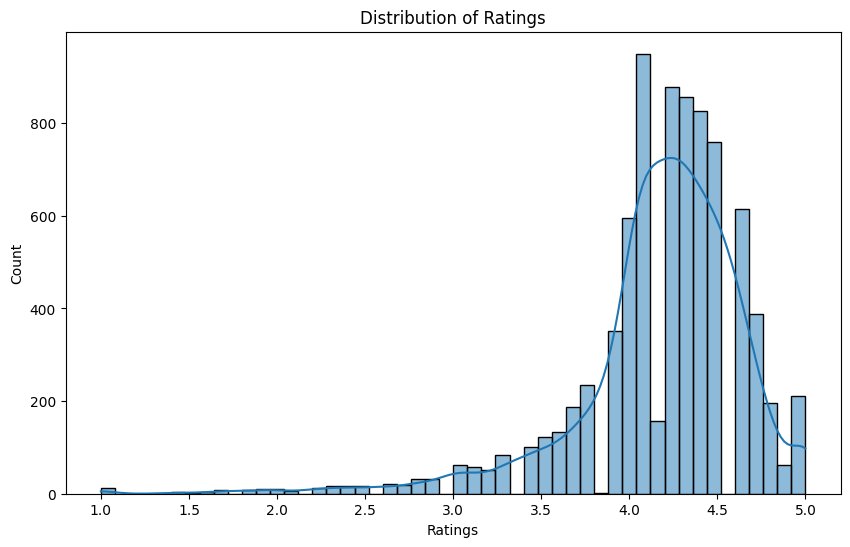

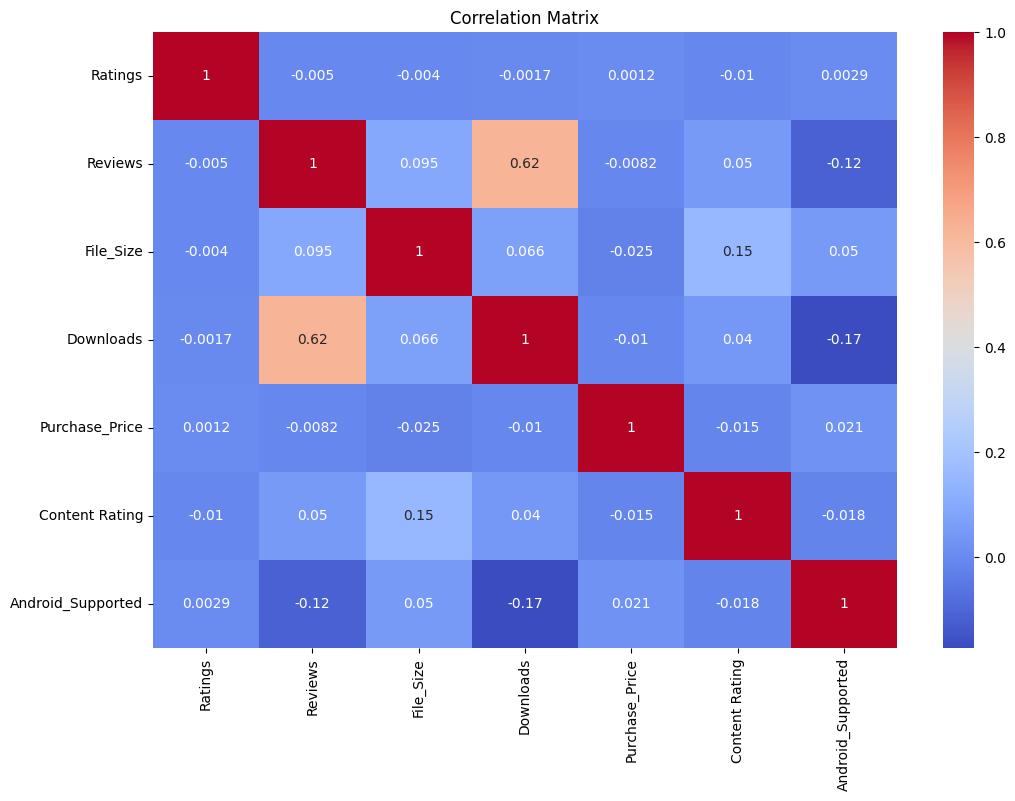

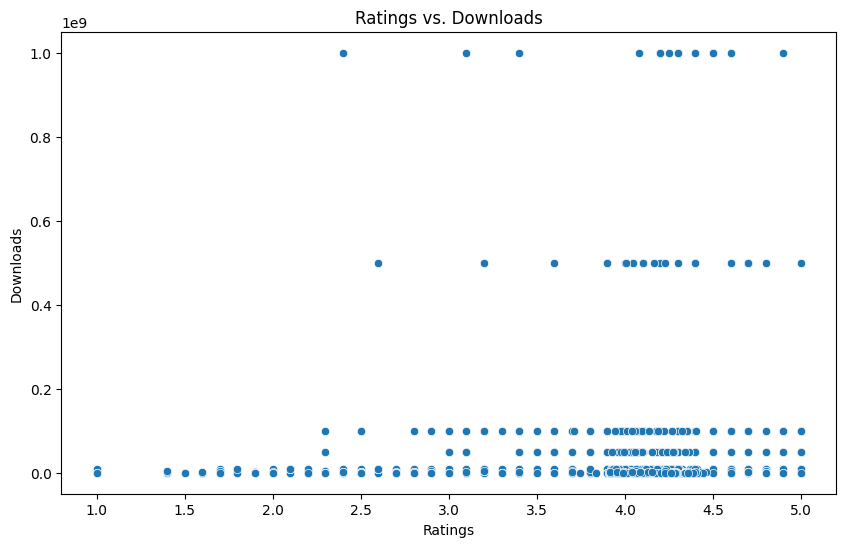

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_v2['Ratings'], bins=50, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_v2.drop(columns=['Application','Category','Genres']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot: Ratings vs. Downloads
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Downloads', data=df_v2)
plt.title('Ratings vs. Downloads')
plt.show()


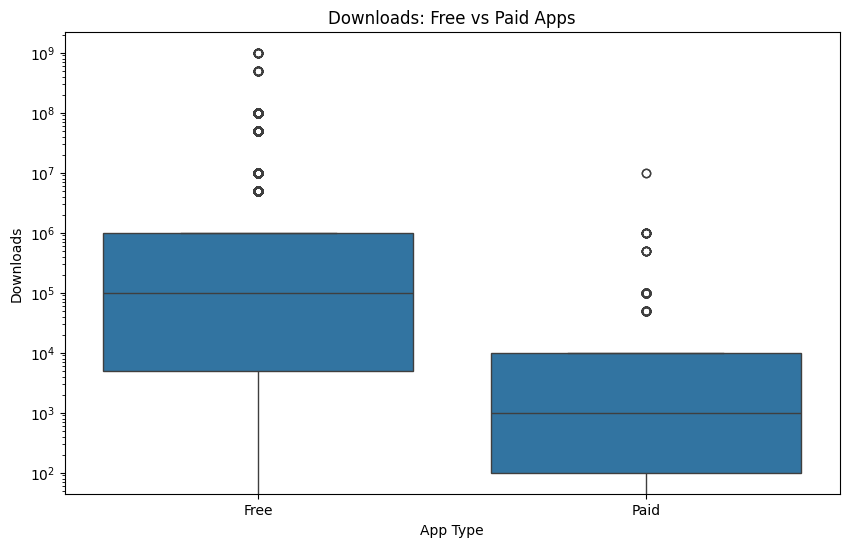

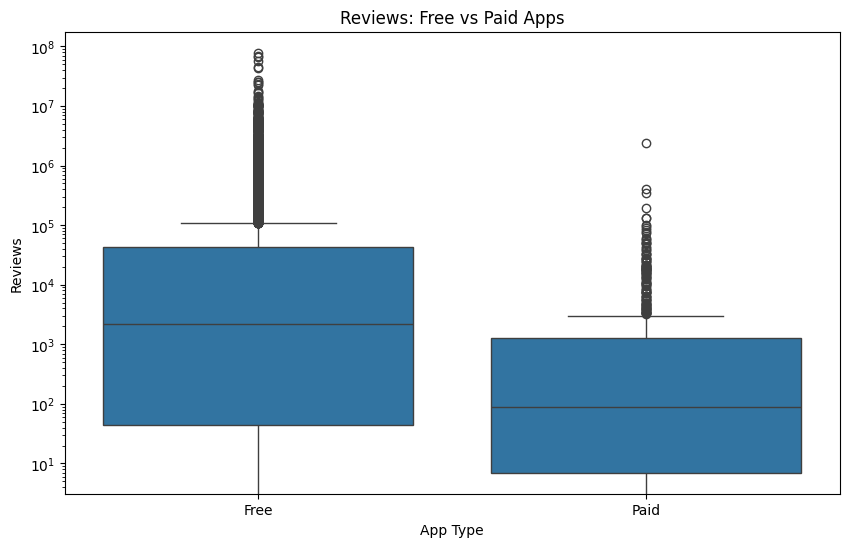

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to distinguish Free vs Paid apps
df_v2['Purchase_Price'] = df_v2['Purchase_Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

# Plot for Downloads
plt.figure(figsize=(10, 6))
sns.boxplot(x='App_Type', y='Downloads', data=df_v2)
plt.title('Downloads: Free vs Paid Apps')
plt.ylabel('Downloads')
plt.xlabel('App Type')
plt.yscale('log')  # Set log scale due to wide range of download values
plt.show()

# Plot for Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='App_Type', y='Reviews', data=df_v2)
plt.title('Reviews: Free vs Paid Apps')
plt.ylabel('Reviews')
plt.xlabel('App Type')
plt.yscale('log')  # Set log scale due to wide range of review counts
plt.show()


<ipython-input-84-7efb5febbd74>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Downloads', y='Genres', data=genre_impact1.head(10), palette='viridis')


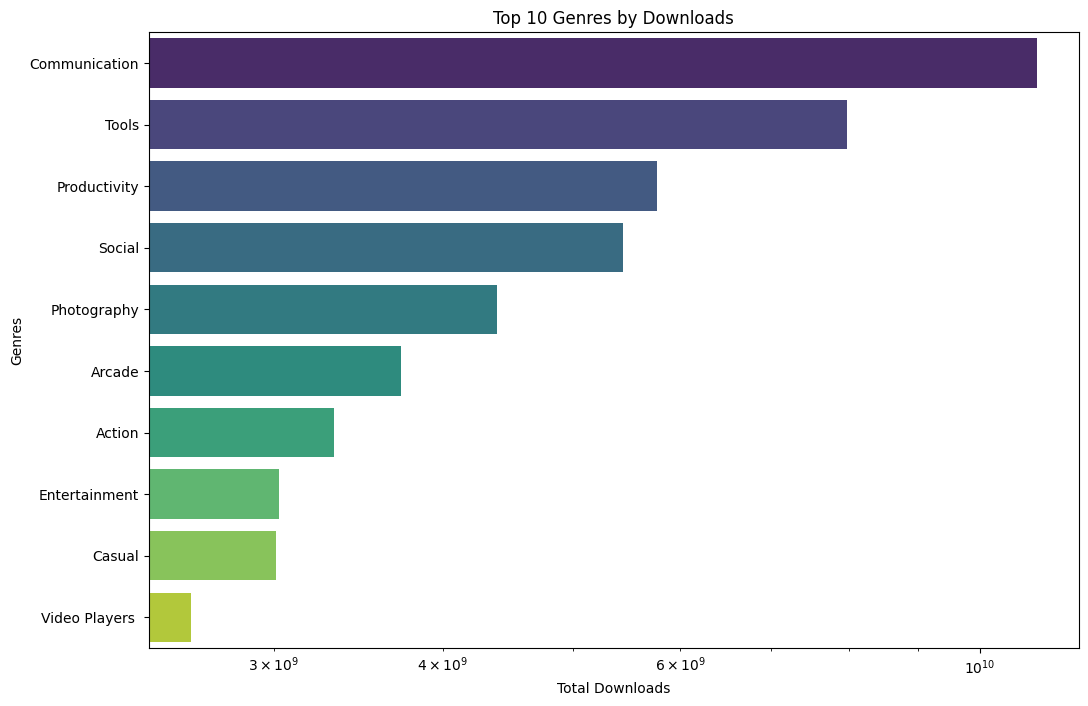

<ipython-input-84-7efb5febbd74>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Genres', data=genre_impact2.head(10), palette='viridis')


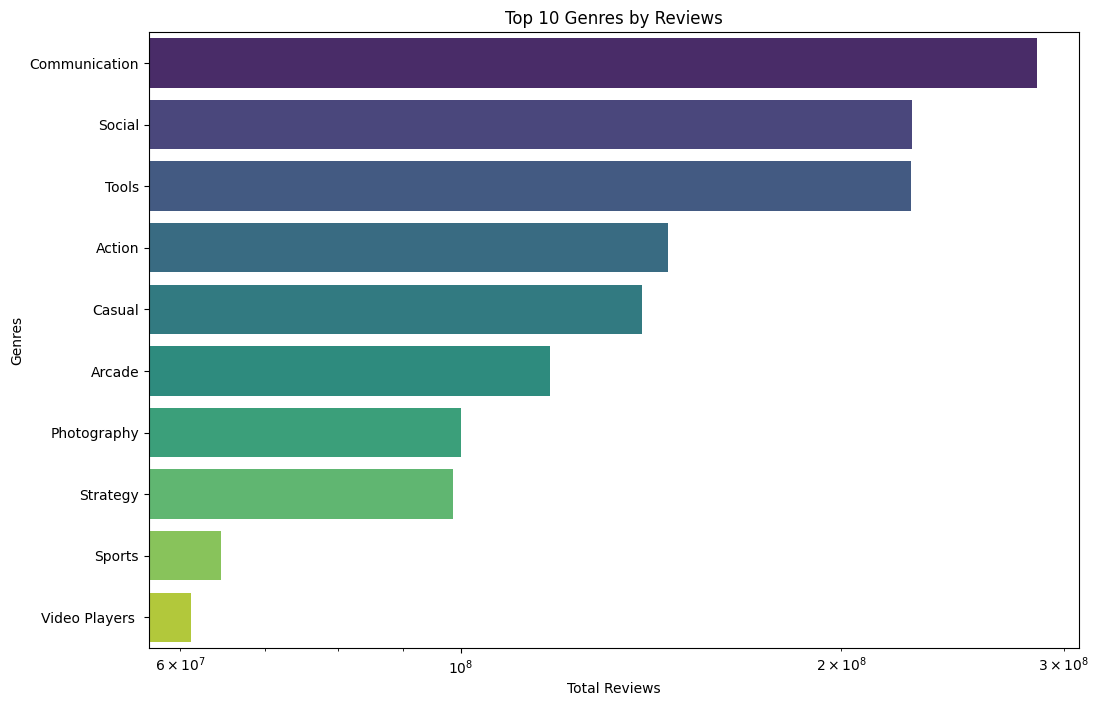

<ipython-input-84-7efb5febbd74>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ratings', y='Genres', data=genre_impact3.head(10), palette='viridis')


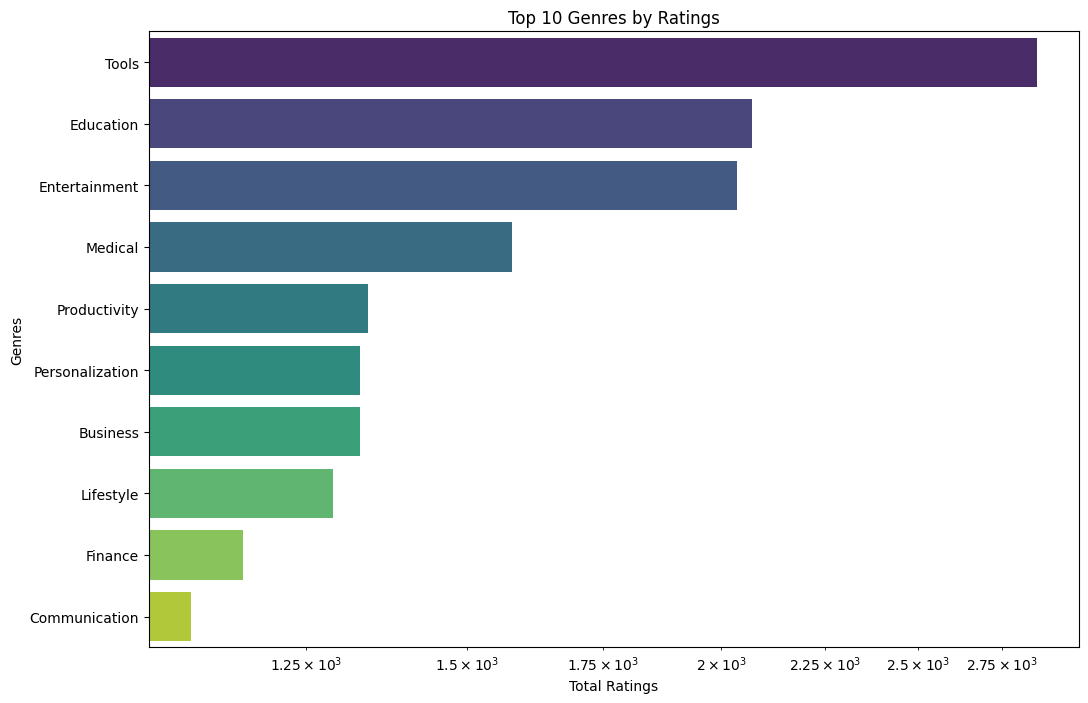

In [84]:
# Group by Genres and sum the Downloads and Reviews
genre_impact1 = df_v2.groupby('Genres')[['Downloads', 'Reviews','Ratings']].sum().reset_index()
genre_impact1=genre_impact1.sort_values(by='Downloads', ascending=False)
# Sort the genres by Downloads and Reviews
genre_impact2 = genre_impact1.sort_values(by= 'Reviews', ascending=False)
genre_impact3 = genre_impact1.sort_values(by= 'Ratings', ascending=False)

# Plot for Genres Impact on Downloads
plt.figure(figsize=(12, 8))
sns.barplot(x='Downloads', y='Genres', data=genre_impact1.head(10), palette='viridis')
plt.title('Top 10 Genres by Downloads')
plt.xlabel('Total Downloads')
plt.ylabel('Genres')
plt.xscale('log')  # Set log scale due to wide range of download values
plt.show()

# Plot for Genres Impact on Reviews
plt.figure(figsize=(12, 8))
sns.barplot(x='Reviews', y='Genres', data=genre_impact2.head(10), palette='viridis')
plt.title('Top 10 Genres by Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Genres')
plt.xscale('log')  # Set log scale due to wide range of review counts
plt.show()


# Plot for Genres Impact on Reviews
plt.figure(figsize=(12, 8))
sns.barplot(x='Ratings', y='Genres', data=genre_impact3.head(10), palette='viridis')
plt.title('Top 10 Genres by Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Genres')
plt.xscale('log')  # Set log scale due to wide range of review counts
plt.show()


In [74]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Prepare features and target variable
X = df_v2[['Ratings', 'Reviews', 'File_Size', 'Purchase_Price', 'Content Rating']]
y = df_v2['Downloads']

# # Handle missing values and non-numeric data
# X['File_Size'] = X['File_Size'].apply(lambda x: float(x.replace('M', '')) if 'M' in x else float(x.replace('k', '')) / 1000)
# X = pd.get_dummies(X)
# y = y.fillna(y.median())  # Fill missing values with median

# Train the model
model = LinearRegression()
model.fit(X, y)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance based on Downloads:")
print(feature_importance)


Feature Importance based on Downloads:
          Feature    Coefficient
4  Content Rating  600907.904450
0         Ratings  183626.756426
2       File_Size   14662.725575
1         Reviews      18.276808
3  Purchase_Price  -16194.034299


In [ ]:
X.info()

In [75]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Prepare features and target variable
X = df_v2[['Downloads', 'Reviews', 'File_Size', 'Purchase_Price', 'Content Rating']]
y = df_v2['Ratings']


# Train the model
model = LinearRegression()
model.fit(X, y)

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance based on Ratings:")
print(feature_importance)


Feature Importance based on Ratings:
          Feature   Coefficient
3  Purchase_Price  2.938897e-05
0       Downloads  2.140035e-11
1         Reviews -1.458163e-09
2       File_Size -4.964512e-05
4  Content Rating -5.841440e-03


In [77]:
def normalize_series(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize coefficients for Downloads model
downloads_coefficients = {
     "Content Rating":  600907.904450,
         "Ratings" : 183626.756426,
      "File_Size"  : 14662.725575,
        "Reviews"  :    18.276808,
 "Purchase_Price"  :-16194.034299,
     "Downloads":100000
}
downloads_importance = pd.Series(downloads_coefficients)
downloads_importance = normalize_series(downloads_importance)

# Normalize coefficients for Ratings model
ratings_coefficients = {
   "Purchase_Price":  2.938897e-05,
   "Downloads":  2.140035e-11,
 "Reviews": -1.458163e-09,
  "File_Size": -4.964512e-05,
  "Content Rating": -5.841440e-03,
   "Ratings":100000
}
ratings_importance = pd.Series(ratings_coefficients)
ratings_importance = normalize_series(ratings_importance)

# Average the normalized importance
combined_importance = (downloads_importance + ratings_importance) / 2

# Assign weights to features
weights = combined_importance.sort_values(ascending=False)
print("Assigned Weights for Parameters:")
print(weights)


Assigned Weights for Parameters:
Ratings           6.619026e-01
Content Rating    5.000000e-01
Downloads         9.414496e-02
File_Size         2.500138e-02
Reviews           1.313587e-02
Purchase_Price    2.935414e-08
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance weights
plt.figure(figsize=(12, 8))
sns.barplot(x=weights.values, y=weights.index, palette='viridis')
plt.title('Feature Importance Weights')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()


In [ ]:
df_v2

In [78]:
weights = {
    'Ratings': 0.25,
    'Content Rating': 0.20,
    'Downloads': 0.30,
    'File_Size': 0.10,
    'Reviews': 0.05,
    'Purchase_Price': 0.05,
    'Genres': 0.05
}

# Create a score for each parameter
df_v2['Ratings_Score'] = df_v2['Ratings'] / df_v2['Ratings'].max()
df_v2['Reviews_Score'] = df_v2['Reviews'] / df_v2['Reviews'].max()
df_v2['Downloads_Score'] = df_v2['Downloads'] / df_v2['Downloads'].max()
df_v2['File_Size'] = df_v2['File_Size'].astype(float)
df_v2['File_Size_Score'] = 1 - (df_v2['File_Size'] / df_v2['File_Size'].max())
df_v2['Purchase_Price_Score'] = 1 - (df_v2['Purchase_Price'] / df_v2['Purchase_Price'].max())
df_v2['Content_Rating_Score'] = df_v2['Content Rating'] / df_v2['Content Rating'].max()

# Calculate weighted score
df_v2['Success_Score'] = (
    weights['Ratings'] * df_v2['Ratings_Score'] +
    weights['Reviews'] * df_v2['Reviews_Score'] +
    weights['Downloads'] * df_v2['Downloads_Score'] +
    weights['File_Size'] * df_v2['File_Size_Score'] +
    weights['Purchase_Price'] * df_v2['Purchase_Price_Score'] +
    weights['Content Rating'] * df_v2['Content_Rating_Score']
)

# Normalize success score
df_v2['Success_Score'] = (df_v2['Success_Score'] - df_v2['Success_Score'].min()) / (df_v2['Success_Score'].max() - df_v2['Success_Score'].min())

# Sort and get top 100 and bottom 100 apps
top_100_apps = df_v2.nlargest(100, 'Success_Score')
bottom_100_apps = df_v2.nsmallest(100, 'Success_Score')

# Save the results
top_100_apps.to_csv('top_100_apps.csv', index=False)
bottom_100_apps.to_csv('bottom_100_apps.csv', index=False)



In [79]:
top_100_apps.to_csv('top_100_apps.csv', index=False)
bottom_100_apps.to_csv('bottom_100_apps.csv', index=False)

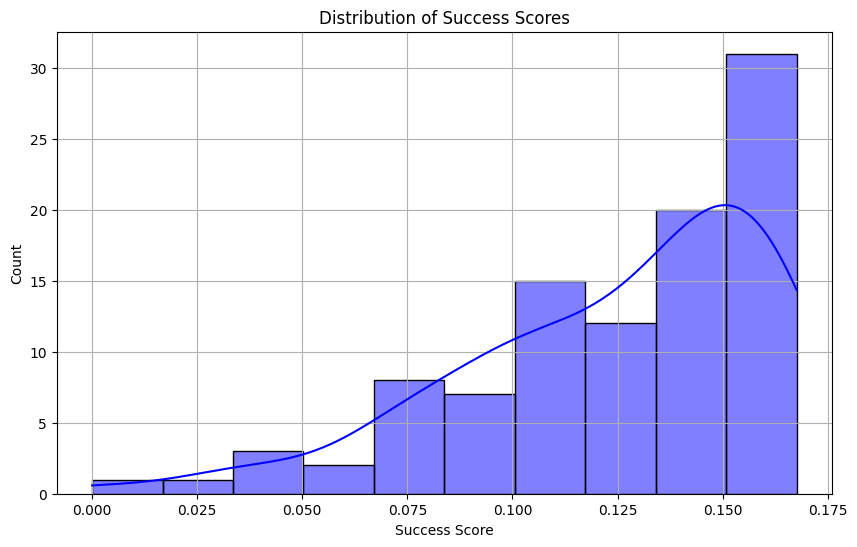

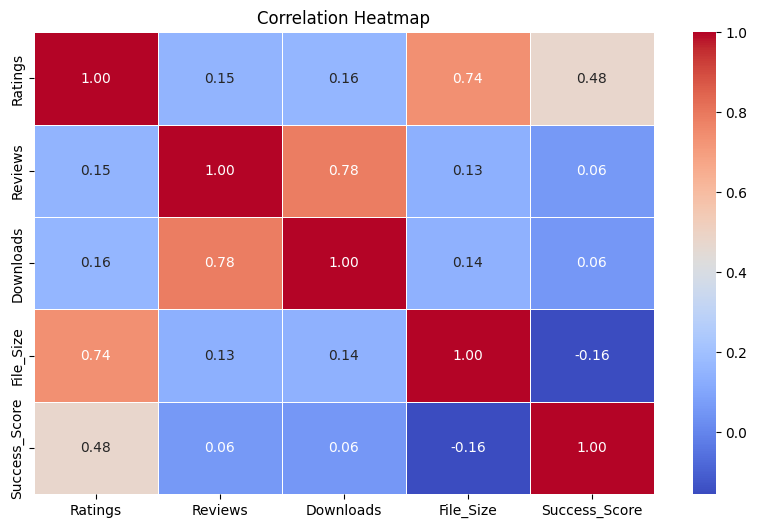

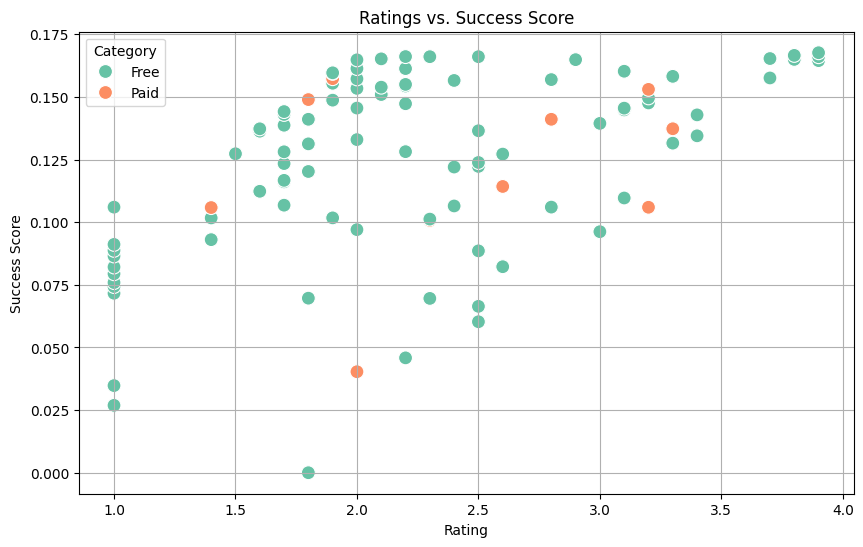

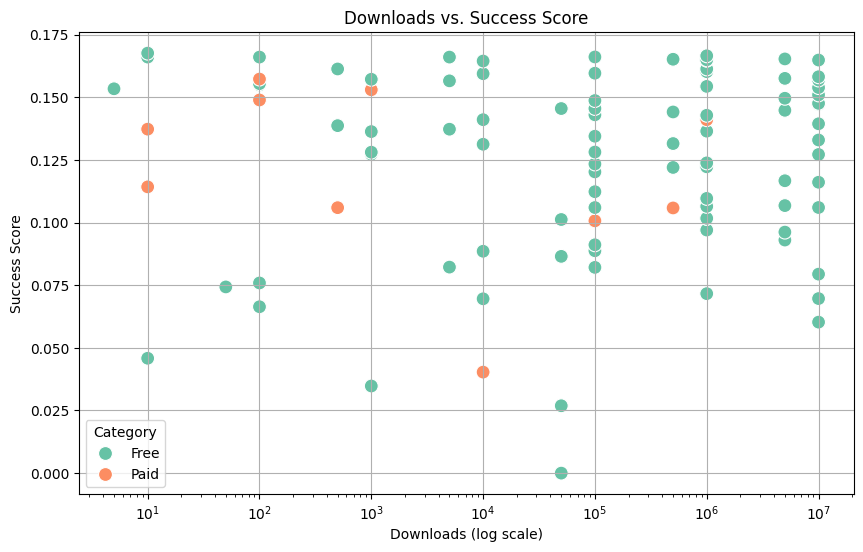

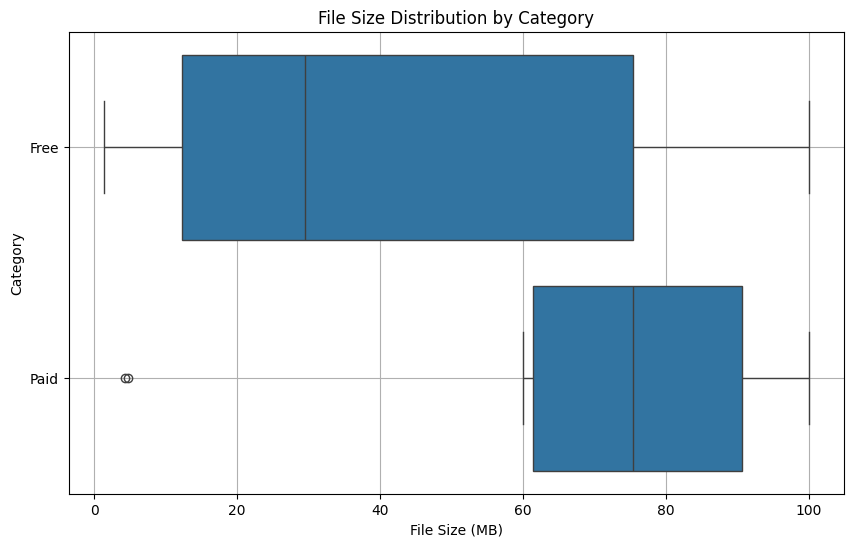

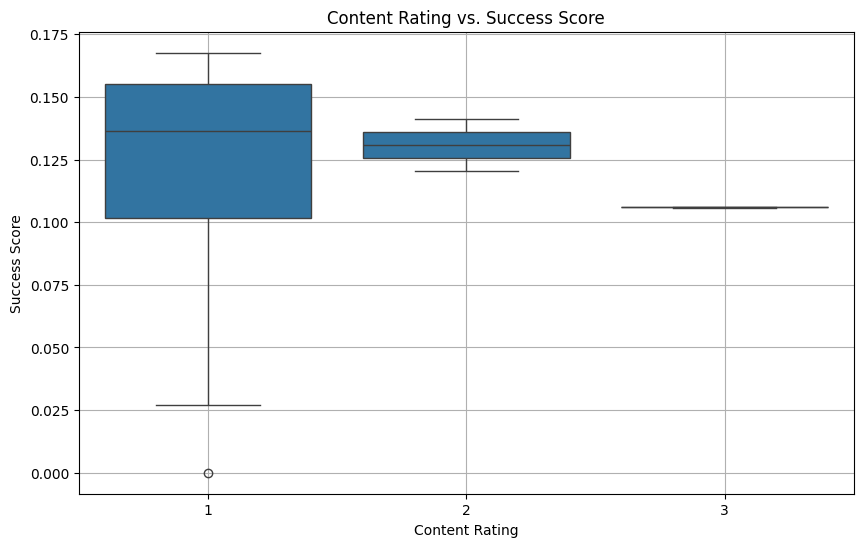

<ipython-input-89-76ffe6f22e48>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Success_Score', palette='viridis')


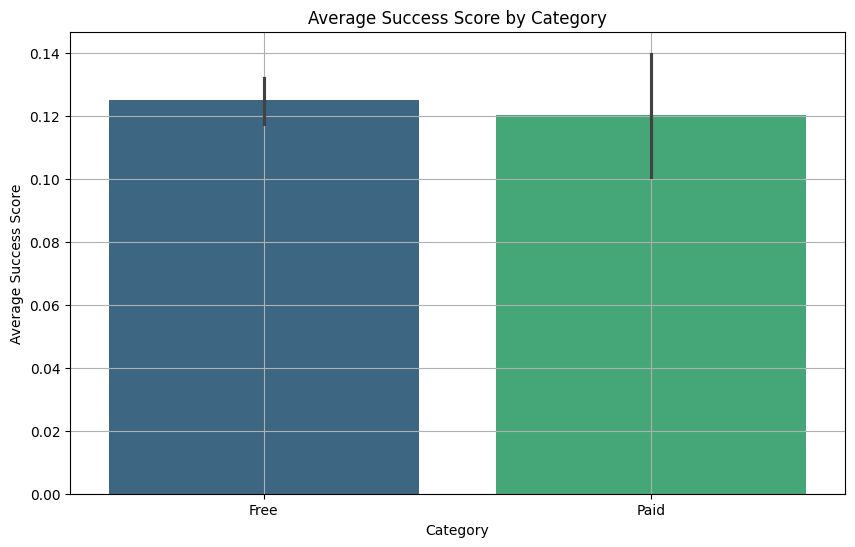

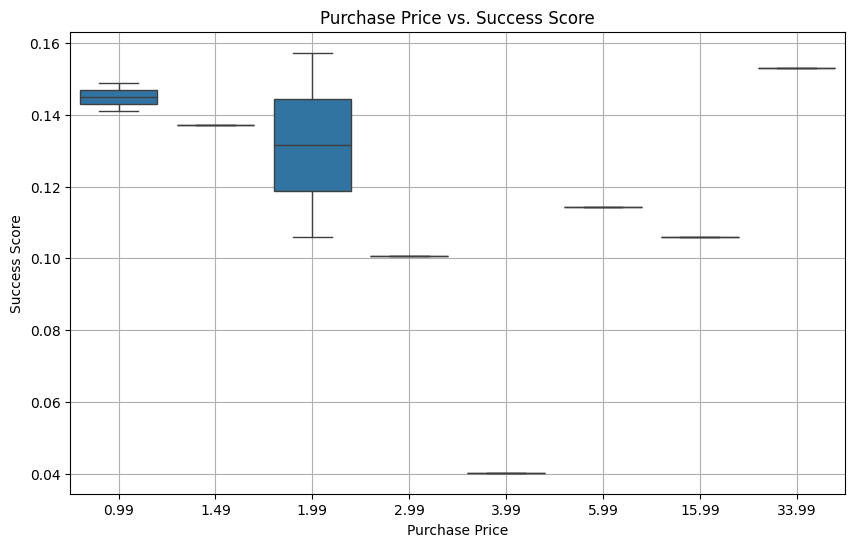

In [89]:
df = bottom_100_apps

# Distribution of Success Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Success_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Success Scores')
plt.xlabel('Success Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['Ratings', 'Reviews', 'Downloads', 'File_Size', 'Success_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Ratings vs. Success Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Success_Score', hue='Category', palette='Set2', s=100)
plt.title('Ratings vs. Success Score')
plt.xlabel('Rating')
plt.ylabel('Success Score')
plt.grid(True)
plt.show()

# Downloads vs. Success Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Downloads', y='Success_Score', hue='Category', palette='Set2', s=100)
plt.title('Downloads vs. Success Score')
plt.xscale('log')
plt.xlabel('Downloads (log scale)')
plt.ylabel('Success Score')
plt.grid(True)
plt.show()

# File Size Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='File_Size', y='Category')
plt.title('File Size Distribution by Category')
plt.xlabel('File Size (MB)')
plt.ylabel('Category')
plt.grid(True)
plt.show()

# Content Rating vs. Success Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Content Rating', y='Success_Score')
plt.title('Content Rating vs. Success Score')
plt.xlabel('Content Rating')
plt.ylabel('Success Score')
plt.grid(True)
plt.show()

# Category-wise Success Score
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Success_Score', palette='viridis')
plt.title('Average Success Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Success Score')
plt.grid(True)
plt.show()

# Purchase Price vs. Success Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Purchase_Price'] > 0], x='Purchase_Price', y='Success_Score')
plt.title('Purchase Price vs. Success Score')
plt.xlabel('Purchase Price')
plt.ylabel('Success Score')
plt.grid(True)
plt.show()